In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import imageio as io
import matplotlib.colors as colors
import pywt
from skimage import metrics

In [2]:
import requests
from PIL import Image
from io import BytesIO

img_urls = ['https://cims.nyu.edu/~cfgranda/foto.jpg']

img_array = []
for url in img_urls:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.convert('L')
    img = img.resize((512, 512))
    img = np.array(img)
    img_array.append(img)

In [3]:
def visualize_image_and_recon(image, recon_image, figsize = (10, 5)):
    
    fig, axes = plt.subplots(nrows=1, ncols=2,  figsize = figsize)
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    
    axes[1].imshow(recon_image, cmap='gray')
    axes[1].set_title(f"Reconstructed. PSNR: {metrics.peak_signal_noise_ratio(image, recon_image, data_range = 255.): .3f}")
    
    plt.show()

In [4]:
image = np.array(img_array[0])

In [5]:
n_levels = 3
wav_type = 'haar'
x_w = pywt.wavedec2(image, wav_type, level=n_levels)

### Visualizing wavelet coeffs

In [6]:
coeff_array, coeff_slices = pywt.coeffs_to_array(x_w)

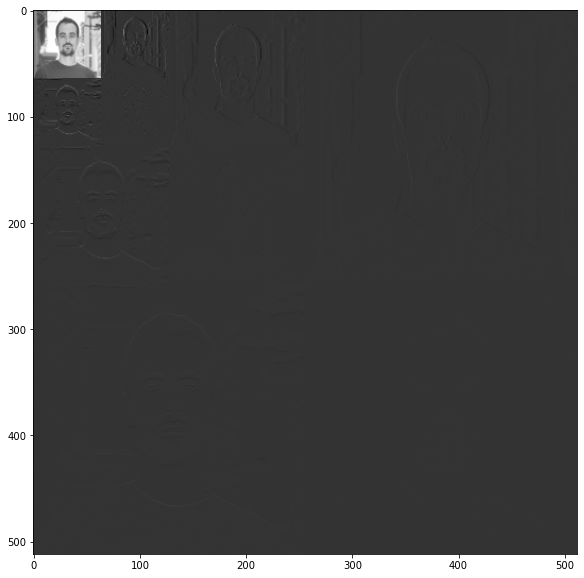

In [7]:
plt.figure(figsize = (10, 10))
plt.imshow(coeff_array, cmap='gray')

### Reconstructing the image

In [8]:
coeff_correctformat = pywt.array_to_coeffs(coeff_array, coeff_slices, output_format='wavedec2')

In [9]:
recon_image = pywt.waverec2(coeff_correctformat, wavelet=wav_type)

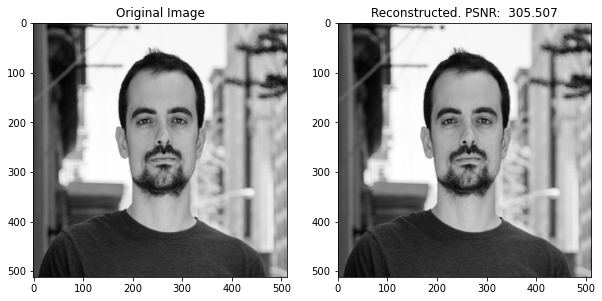

In [10]:
visualize_image_and_recon(image, recon_image)